In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from prophet import Prophet

c:\Users\dani3\anaconda3\envs\Capstone\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Read Dataset & Exploratory Data Analysis

## Reading Dataset

In [2]:
#Reading csv file
data = pd.read_csv("Capstone dataset.csv")

In [4]:
#Checking csv file
data.head()

,Date,CPI for All items,CPI for Commodities less Food and Energy,CPI for Communication,CPI for Education,CPI for Energy,CPI for Food,CPI for Gas,CPI for Medical Services,CPI for Shelter,Employment,Export Price Index,Fed rates,Import Price Index,Unemployment,Hourly Earnings,Avg Bank Rates,Nominal GDP,USD Strength
0,1 Mar 2006,199.7,140.6,84.3,159.1,192.0,194.0,208.3,346.3,229.3,143741,108.8,4.59,112.7,7072,20.04,7.53,13711.223,100.4281
1,1 Apr 2006,200.7,140.8,84.4,159.9,198.5,193.8,224.0,347.6,230.1,143761,109.6,4.79,115.1,7120,20.16,7.75,13695.003,99.7435
2,1 May 2006,201.3,140.9,84.1,160.7,199.8,194.1,227.5,348.9,231.0,144089,110.4,4.94,117.2,6980,20.13,7.93,13782.849,97.5118
3,1 Jun 2006,201.8,141.0,84.2,161.6,199.8,194.7,228.1,350.2,231.9,144353,111.2,4.99,117.3,7001,20.22,8.02,13782.420,98.6927
4,1 Jul 2006,202.9,140.8,84.4,162.4,207.9,195.2,245.3,351.2,232.7,144202,111.6,5.24,118.2,7175,20.30,8.25,13791.729,98.4387


In [4]:
#Listing out data shape & number of unique entries per data column

print(data.shape)
print(data.dtypes)

(200, 19)
Date                                         object
CPI for All items                           float64
CPI for Commodities less Food and Energy    float64
CPI for Communication                       float64
CPI for Education                           float64
CPI for Energy                              float64
CPI for Food                                float64
CPI for Gas                                 float64
CPI for Medical Services                    float64
CPI for Shelter                             float64
Employment                                    int64
Export Price Index                          float64
Fed rates                                   float64
Import Price Index                          float64
Unemployment                                  int64
Hourly Earnings                             float64
Avg Bank Rates                              float64
Nominal GDP                                 float64
USD Strength                                float64
dt

In [5]:
# Checking null results within data

print(data.isnull().sum())

# Checking NA results within data
print("\n")
print(data.isna().sum())

Date                                        0
CPI for All items                           0
CPI for Commodities less Food and Energy    0
CPI for Communication                       0
CPI for Education                           0
CPI for Energy                              0
CPI for Food                                0
CPI for Gas                                 0
CPI for Medical Services                    0
CPI for Shelter                             0
Employment                                  0
Export Price Index                          0
Fed rates                                   0
Import Price Index                          0
Unemployment                                0
Hourly Earnings                             0
Avg Bank Rates                              0
Nominal GDP                                 0
USD Strength                                0
dtype: int64


Date                                        0
CPI for All items                           0
CPI for Commodities

In [6]:
## Describe data

data.describe().round(2).T.style.background_gradient(
    vmin=1, vmax=1, cmap=sns.color_palette('flare', as_cmap=True)
)

,count,mean,std,min,25%,50%,75%,max
CPI for All items,200.000000,236.960000,22.340000,199.700000,217.840000,236.120000,251.870000,298.060000
CPI for Commodities less Food and Energy,200.000000,145.830000,5.710000,139.700000,143.400000,144.700000,146.810000,167.410000
CPI for Communication,200.000000,79.980000,4.250000,72.920000,75.330000,82.340000,83.500000,85.120000
CPI for Education,200.000000,228.290000,36.170000,159.100000,198.590000,231.940000,260.380000,284.850000
CPI for Energy,200.000000,222.460000,28.640000,176.400000,202.290000,216.670000,243.080000,332.090000
CPI for Food,200.000000,240.810000,25.930000,193.800000,219.230000,242.940000,254.050000,314.980000
CPI for Gas,200.000000,250.900000,50.140000,154.380000,212.730000,240.150000,297.230000,413.610000
CPI for Medical Services,200.000000,468.210000,70.570000,346.300000,409.470000,464.890000,518.650000,611.320000
CPI for Shelter,200.000000,279.940000,34.950000,229.300000,249.270000,270.520000,309.120000,362.270000
Employment,200.000000,147763.000000,6249.670000,133320.000000,143326.500000,146260.000000,153093.500000,158936.000000


In [5]:
# Changing Data from object to datetime

data['Date'] = pd.to_datetime(data['Date'])

In [6]:
data.dtypes

Date                                        datetime64[ns]
CPI for All items                                  float64
CPI for Commodities less Food and Energy           float64
CPI for Communication                              float64
CPI for Education                                  float64
CPI for Energy                                     float64
CPI for Food                                       float64
CPI for Gas                                        float64
CPI for Medical Services                           float64
CPI for Shelter                                    float64
Employment                                           int64
Export Price Index                                 float64
Fed rates                                          float64
Import Price Index                                 float64
Unemployment                                         int64
Hourly Earnings                                    float64
Avg Bank Rates                                     float

In [9]:
data.columns

Index(['Date', 'CPI for All items', 'CPI for Commodities less Food and Energy',
       'CPI for Communication', 'CPI for Education', 'CPI for Energy',
       'CPI for Food', 'CPI for Gas', 'CPI for Medical Services',
       'CPI for Shelter', 'Employment', 'Export Price Index', 'Fed rates',
       'Import Price Index', 'Unemployment', 'Hourly Earnings',
       'Avg Bank Rates', 'Nominal GDP', 'USD Strength'],
      dtype='object')

# Exploratory Data Analysis

### Line plot for CPI over time

In [9]:
import plotly.graph_objs as go
from datetime import datetime
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline

CPI_fig = px.line(data, x=data.Date, y = data.columns[1:10], title='Consumer Price Index')
CPI_fig.update_yaxes(title_text = 'CPI')
CPI_fig.update_layout(legend_title_text = 'Types of CPI')

# CPI_fig.add_annotation(x='2008-09-01', y=387,
#             text="Lehman Brothers Crisis, Sep 2008",
#             showarrow=True,
#             arrowhead=2)

# CPI_fig.add_annotation(x='2020-04-01', y=559,
#             text="Covid-19, Apr 2020",
#             showarrow=True,
#             arrowhead=2)

CPI_fig.add_vrect(x0="2008-07-01", x1="2009-01-01", 
              annotation_text="2008 Financial Crisis", annotation_position="top left",  
              annotation_font_size=11,
              annotation_font_color="Green",
              fillcolor="yellow", opacity=0.25, line_width=0)

CPI_fig.add_vrect(x0="2020-03-01", x1="2020-12-01", 
              annotation_text="Covid-19", annotation_position="top left",  
              annotation_font_size=11,
              annotation_font_color="Green",
              fillcolor="orange", opacity=0.25, line_width=0)

CPI_fig.show()

### Line plot for Import/Export over time

In [10]:
import_export = data[['Import Price Index', 'Export Price Index']]

import_export

,Import Price Index,Export Price Index
0,112.7,108.8
1,115.1,109.6
2,117.2,110.4
3,117.3,111.2
4,118.2,111.6
...,...,...
195,148.5,166.7
196,146.4,160.5
197,144.6,158.3
198,143.0,156.0


In [12]:
Import_Export_fig = px.line(data, x=data.Date, y = import_export.columns, title='Import/Export Price Index')
Import_Export_fig.update_yaxes(title_text = 'Import/Export Index')
Import_Export_fig.update_layout(legend_title_text = 'Legend')

# Import_Export_fig.add_annotation(x='2008-09-01', y=137,
#             text="Lehman Brothers Crisis, Sep 2008",
#             showarrow=True,
#             arrowhead=2,
#             yanchor= 'bottom')

# Import_Export_fig.add_annotation(x='2020-04-01', y=120,
#             text="Covid-19, Apr 2020",
#             showarrow=True,
#             arrowhead=2,
#             )

Import_Export_fig.add_vrect(x0="2008-07-01", x1="2009-01-01", 
              annotation_text="2008 Financial Crisis", annotation_position="top left",  
              annotation_font_size=11,
              annotation_font_color="Green",
              fillcolor="yellow", opacity=0.25, line_width=0)

Import_Export_fig.add_vrect(x0="2020-03-01", x1="2020-12-01", 
              annotation_text="Covid-19", annotation_position="top left",  
              annotation_font_size=11,
              annotation_font_color="Green",
              fillcolor="orange", opacity=0.25, line_width=0)

Import_Export_fig.show()

### Line plot for Employment/Unemployment over time

In [13]:
employ_unemploy = data[['Employment', 'Unemployment']]

employ_unemploy

,Employment,Unemployment
0,143741,7072
1,143761,7120
2,144089,6980
3,144353,7001
4,144202,7175
...,...,...
195,158111,5912
196,158290,5670
197,158732,6014
198,158936,5753


In [15]:
Employ_fig = px.line(data, x=data.Date, y = employ_unemploy.columns, title='Employment')
Employ_fig.update_yaxes(title_text = 'US workers in thousands')
Employ_fig.update_layout(legend_title_text = 'Legend')

Employ_fig.add_vrect(x0="2008-07-01", x1="2009-01-01", 
              annotation_text="2008 Financial Crisis", annotation_position="top left",  
              annotation_font_size=11,
              annotation_font_color="Green",
              fillcolor="yellow", opacity=0.25, line_width=0)

Employ_fig.add_vrect(x0="2020-03-01", x1="2020-12-01", 
              annotation_text="Covid-19", annotation_position="top left",  
              annotation_font_size=11,
              annotation_font_color="Green",
              fillcolor="orange", opacity=0.25, line_width=0)

Employ_fig.show()

### Line plot for Feds rates and Bank rates

In [15]:
data.columns

Index(['Date', 'CPI for All items', 'CPI for Commodities less Food and Energy',
       'CPI for Communication', 'CPI for Education', 'CPI for Energy',
       'CPI for Food', 'CPI for Gas', 'CPI for Medical Services',
       'CPI for Shelter', 'Employment', 'Export Price Index', 'Fed rates',
       'Import Price Index', 'Unemployment', 'Hourly Earnings',
       'Avg Bank Rates', 'Nominal GDP', 'USD Strength'],
      dtype='object')

In [16]:
feds_banks = data[['Fed rates', 'Avg Bank Rates']]

feds_banks

,Fed rates,Avg Bank Rates
0,4.59,7.53
1,4.79,7.75
2,4.94,7.93
3,4.99,8.02
4,5.24,8.25
...,...,...
195,1.21,4.38
196,1.68,4.85
197,2.33,5.50
198,2.56,5.73


In [17]:
Feds_Wages_fig = px.line(data, x=data.Date, y = feds_banks.columns, title='Fed and Bank rates')
Feds_Wages_fig.update_yaxes(title_text = 'Percentages(%)')
Feds_Wages_fig.update_layout(legend_title_text = 'Legend')

Feds_Wages_fig.add_vrect(x0="2008-07-01", x1="2009-01-01", 
              annotation_text="2008 Financial Crisis", annotation_position="top left",  
              annotation_font_size=11,
              annotation_font_color="Green",
              fillcolor="yellow", opacity=0.25, line_width=0)

Feds_Wages_fig.add_vrect(x0="2020-03-01", x1="2020-12-01", 
              annotation_text="Covid-19", annotation_position="top left",  
              annotation_font_size=11,
              annotation_font_color="Green",
              fillcolor="orange", opacity=0.25, line_width=0)


Feds_Wages_fig.show()

### Line plot for GDP

In [18]:
GDP_fig = px.line(data, x=data.Date, y = data['Nominal GDP'], title='Gross Domestic Product')
GDP_fig.update_yaxes(title_text = 'USD in billions')
GDP_fig.update_layout(legend_title_text = 'Legend')

GDP_fig.add_vrect(x0="2008-07-01", x1="2009-01-01", 
              annotation_text="2008 Financial Crisis", annotation_position="top left",  
              annotation_font_size=11,
              annotation_font_color="Green",
              fillcolor="yellow", opacity=0.25, line_width=0)

GDP_fig.add_vrect(x0="2020-03-01", x1="2020-12-01", 
              annotation_text="Covid-19", annotation_position="top left",  
              annotation_font_size=11,
              annotation_font_color="Green",
              fillcolor="orange", opacity=0.25, line_width=0)



GDP_fig.show()

### Line plot for Wages and USD currency strength

In [19]:
data.columns

Index(['Date', 'CPI for All items', 'CPI for Commodities less Food and Energy',
       'CPI for Communication', 'CPI for Education', 'CPI for Energy',
       'CPI for Food', 'CPI for Gas', 'CPI for Medical Services',
       'CPI for Shelter', 'Employment', 'Export Price Index', 'Fed rates',
       'Import Price Index', 'Unemployment', 'Hourly Earnings',
       'Avg Bank Rates', 'Nominal GDP', 'USD Strength'],
      dtype='object')

In [19]:
wages_USD = data[['Hourly Earnings', 'USD Strength']]

wages_USD

,Hourly Earnings,USD Strength
0,20.04,100.4281
1,20.16,99.7435
2,20.13,97.5118
3,20.22,98.6927
4,20.30,98.4387
...,...,...
195,32.11,120.1621
196,32.27,122.8209
197,32.36,122.4264
198,32.49,125.7480


In [20]:
Wages_fig = px.line(data, x=data.Date, y = wages_USD.columns)
Wages_fig.update_yaxes(title_text = 'USD')
Wages_fig.update_layout(legend_title_text = 'Legend')

Wages_fig.add_vrect(x0="2008-07-01", x1="2009-01-01", 
              annotation_text="2008 Financial Crisis", annotation_position="top left",  
              annotation_font_size=11,
              annotation_font_color="Green",
              fillcolor="yellow", opacity=0.25, line_width=0)

Wages_fig.add_vrect(x0="2020-03-01", x1="2020-12-01", 
              annotation_text="Covid-19", annotation_position="top left",  
              annotation_font_size=11,
              annotation_font_color="Green",
              fillcolor="orange", opacity=0.25, line_width=0)


Wages_fig.show()

## Correlation plot

In [22]:
data.columns

Index(['Date', 'CPI for All items', 'CPI for Commodities less Food and Energy',
       'CPI for Communication', 'CPI for Education', 'CPI for Energy',
       'CPI for Food', 'CPI for Gas', 'CPI for Medical Services',
       'CPI for Shelter', 'Employment', 'Export Price Index', 'Fed rates',
       'Import Price Index', 'Unemployment', 'Hourly Earnings',
       'Avg Bank Rates', 'Nominal GDP', 'USD Strength'],
      dtype='object')

In [23]:
corr_data = data.drop('Date', inplace=False, axis=1)

corr_data

,CPI for All items,CPI for Commodities less Food and Energy,CPI for Communication,CPI for Education,CPI for Energy,CPI for Food,CPI for Gas,CPI for Medical Services,CPI for Shelter,Employment,Export Price Index,Fed rates,Import Price Index,Unemployment,Hourly Earnings,Avg Bank Rates,Nominal GDP,USD Strength
0,199.700,140.600,84.300,159.100,192.000,194.000,208.300,346.300,229.300,143741,108.8,4.59,112.7,7072,20.04,7.53,13711.223,100.4281
1,200.700,140.800,84.400,159.900,198.500,193.800,224.000,347.600,230.100,143761,109.6,4.79,115.1,7120,20.16,7.75,13695.003,99.7435
2,201.300,140.900,84.100,160.700,199.800,194.100,227.500,348.900,231.000,144089,110.4,4.94,117.2,6980,20.13,7.93,13782.849,97.5118
3,201.800,141.000,84.200,161.600,199.800,194.700,228.100,350.200,231.900,144353,111.2,4.99,117.3,7001,20.22,8.02,13782.420,98.6927
4,202.900,140.800,84.400,162.400,207.900,195.200,245.300,351.200,232.700,144202,111.6,5.24,118.2,7175,20.30,8.25,13791.729,98.4387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,295.328,166.235,75.328,281.705,332.087,304.867,413.606,598.227,352.550,158111,166.7,1.21,148.5,5912,32.11,4.38,25519.004,120.1621
196,295.271,166.617,75.027,282.097,316.955,308.220,381.710,600.683,354.449,158290,160.5,1.68,146.4,5670,32.27,4.85,25476.223,122.8209
197,295.620,167.381,74.895,283.499,301.045,310.664,341.383,605.320,356.894,158732,158.3,2.33,144.6,6014,32.36,5.50,25869.257,122.4264
198,296.761,167.413,74.813,284.498,294.705,313.101,324.646,611.319,359.567,158936,156.0,2.56,143.0,5753,32.49,5.73,25813.680,125.7480


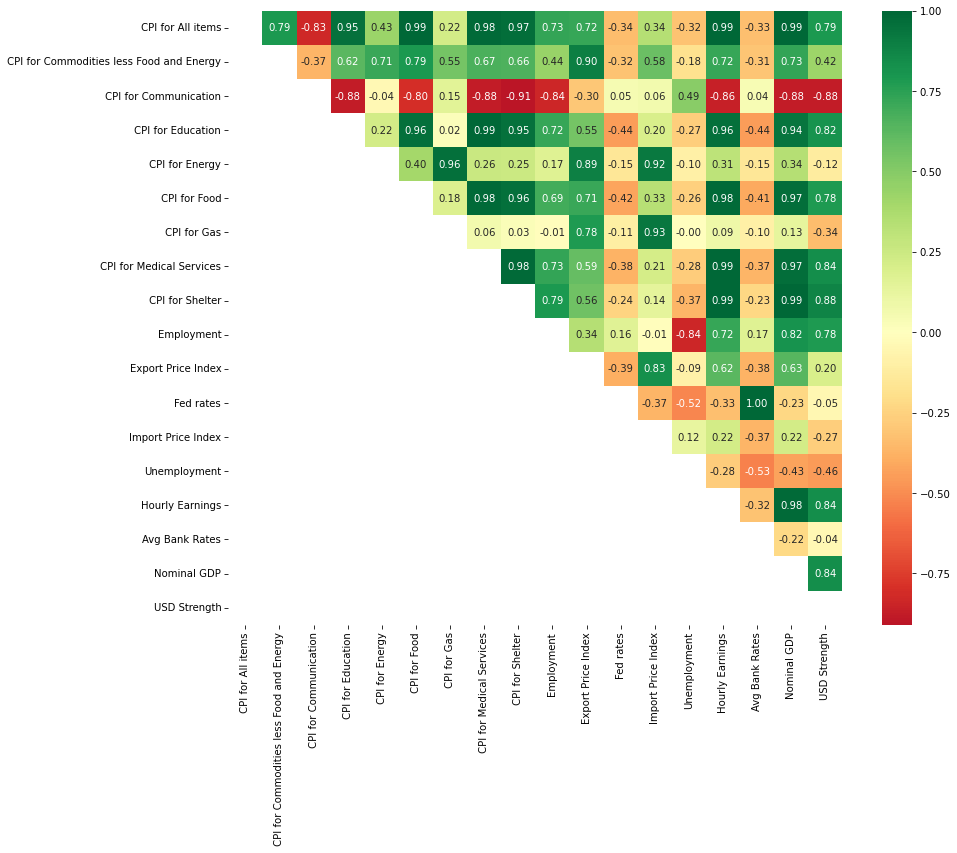

In [24]:
plt.rcParams['figure.dpi'] = 72.5

# Calculate pairwise-correlation
matrix = corr_data.corr().round(2)

# Create a mask
mask = np.tril(np.ones_like(matrix, dtype=bool))

# Create a custom divergin palette
cmap = sns.diverging_palette(250, 15, s=75, l=40,
                            n=9, center="light", as_cmap=True)

plt.figure(figsize=(14, 11))
sns.heatmap(matrix, mask = mask, center=0, annot=True,
            fmt='.2f', square=True, cmap='RdYlGn')

plt.show()

In [25]:
#Ranking positive correlations
unstack_1 = matrix.unstack().sort_values(ascending=False)
unstack_1[unstack_1<1.0].head(10)

# unstack_2 = matrix.unstack().sort_values(ascending=True)
# unstack_2[unstack_2<-0.84].head(10)

CPI for Education  CPI for Medical Services    0.99
CPI for Food       CPI for All items           0.99
Nominal GDP        CPI for All items           0.99
CPI for Shelter    Nominal GDP                 0.99
CPI for All items  CPI for Food                0.99
                   Hourly Earnings             0.99
Hourly Earnings    CPI for Shelter             0.99
CPI for All items  Nominal GDP                 0.99
Hourly Earnings    CPI for Medical Services    0.99
                   CPI for All items           0.99
dtype: float64

Positive correlations:
- Fed rates & Bank rates = 1.00
- CPI & Hourly Earnings = 0.99
- CPI & GDP = 0.99
- CPI for Shelter & Hourly Earnings = 0.99
- CPI for Shelter & GDP = 0.99
- CPI for Commodities less Food and energy & Export Price Index = 0.9
- CPI for Education & Hourly Earnings = 0.96
- CPI for Education & GDP = 0.94
- CPI for Food & Hourly Earnings = 0.98
- CPI for Food & GDP = 0.97

Negative correlations:
- In general, CPI for Communication has negative correlations with other features e.g. GDP, USD Strength, Hourly Earnings, Employment
ranging from -0.84 to - 0.88


Medium post on Time Series Forecasting for Univariate (Sales forecast): ARIMA vs LSTM vs PROPHET: https://medium.com/analytics-vidhya/time-series-forecasting-arima-vs-lstm-vs-prophet-62241c203a3b

Multivariate(Beijing Pollution) Time Series Forecasting with LSTMs in Keras: https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/

Medium post on Multivariate(Stocks) Time Series Forecasting using FBProphet: https://medium.com/mlearning-ai/multivariate-time-series-forecasting-using-fbprophet-66147f049e66

Medium post on Multivariate(Google Stock and Vanguard index) Time Series Forecasting with Seasonality and Holiday Effect Using Prophet: https://medium.com/grabngoinfo/multivariate-time-series-forecasting-with-seasonality-and-holiday-effect-using-prophet-in-python-d5d4150eeb57

# FbProphet

In [26]:
data.head()

,Date,CPI for All items,CPI for Commodities less Food and Energy,CPI for Communication,CPI for Education,CPI for Energy,CPI for Food,CPI for Gas,CPI for Medical Services,CPI for Shelter,Employment,Export Price Index,Fed rates,Import Price Index,Unemployment,Hourly Earnings,Avg Bank Rates,Nominal GDP,USD Strength
0,2006-03-01,199.7,140.6,84.3,159.1,192.0,194.0,208.3,346.3,229.3,143741,108.8,4.59,112.7,7072,20.04,7.53,13711.223,100.4281
1,2006-04-01,200.7,140.8,84.4,159.9,198.5,193.8,224.0,347.6,230.1,143761,109.6,4.79,115.1,7120,20.16,7.75,13695.003,99.7435
2,2006-05-01,201.3,140.9,84.1,160.7,199.8,194.1,227.5,348.9,231.0,144089,110.4,4.94,117.2,6980,20.13,7.93,13782.849,97.5118
3,2006-06-01,201.8,141.0,84.2,161.6,199.8,194.7,228.1,350.2,231.9,144353,111.2,4.99,117.3,7001,20.22,8.02,13782.420,98.6927
4,2006-07-01,202.9,140.8,84.4,162.4,207.9,195.2,245.3,351.2,232.7,144202,111.6,5.24,118.2,7175,20.30,8.25,13791.729,98.4387


### Scaling data (optional)

In [27]:
# scaling_data = data.drop(columns=['Date','CPI for All items'], axis = 1)

# scaling_data

In [28]:
# #Scaling

# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# scaler.fit(scaling_data)

# col_name = scaling_data.columns

# scaling_data = scaler.transform(scaling_data)
# scaling_data = pd.DataFrame(scaling_data, columns=col_name)
# scaled_data = scaling_data.join(data[['Date','CPI for All items']])


In [29]:
# scaled_data.head()

In [30]:
data.dtypes

Date                                        datetime64[ns]
CPI for All items                                  float64
CPI for Commodities less Food and Energy           float64
CPI for Communication                              float64
CPI for Education                                  float64
CPI for Energy                                     float64
CPI for Food                                       float64
CPI for Gas                                        float64
CPI for Medical Services                           float64
CPI for Shelter                                    float64
Employment                                           int64
Export Price Index                                 float64
Fed rates                                          float64
Import Price Index                                 float64
Unemployment                                         int64
Hourly Earnings                                    float64
Avg Bank Rates                                     float

### Train test split

In [31]:
# Renaming Date and CPI for all items into ds and y respectively because prophet will detect both these column headers

data.rename(columns = {'Date' : 'ds', 'CPI for All items': 'y'}, inplace = True)

In [32]:
#Setting limit date for train and test datasets

train_end_date = '2019-07-01'

In [33]:
#Splitting train and test datasets based on limit date

train = data[data['ds'] < train_end_date]
test = data[data['ds'] >= train_end_date]

In [34]:
# Checking the sahpe of the train and test datasets

print(train.shape)
print(test.shape)

(160, 19)
(40, 19)


In [35]:
# Check the start and end time of the training and testing dataset

print('The start time of the training dataset is ', train['ds'].min())
print('The end time of the training dataset is ', train['ds'].max())
print('The start time of the testing dataset is ', test['ds'].min())
print('The end time of the testing dataset is ', test['ds'].max())

The start time of the training dataset is  2006-03-01 00:00:00
The end time of the training dataset is  2019-06-01 00:00:00
The start time of the testing dataset is  2019-07-01 00:00:00
The end time of the testing dataset is  2022-10-01 00:00:00


## Training baseline univariate model

### Fitting

In [36]:
# Use the default hyperparameters to initiate the Prophet model
model_baseline = Prophet()

# Fit the model on the training dataset
model_baseline.fit(train)

20:53:44 - cmdstanpy - INFO - Chain [1] start processing
20:53:44 - cmdstanpy - INFO - Chain [1] done processing


### Building forecast

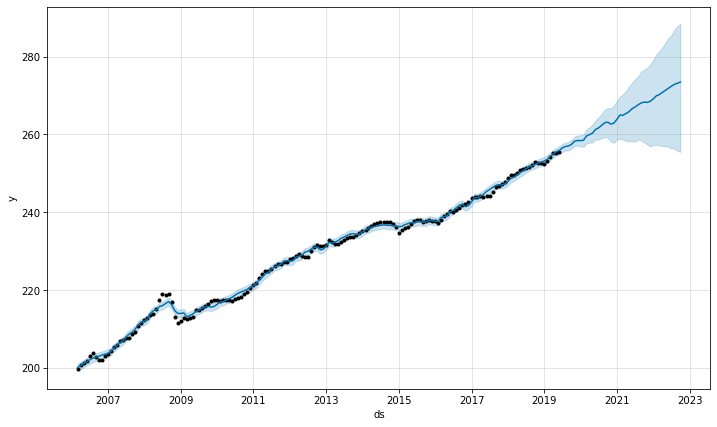

In [37]:
# Create the time range for the forecast
future_baseline = model_baseline.make_future_dataframe(periods=40, freq = 'MS')

# Make prediction
forecast_baseline = model_baseline.predict(future_baseline)

# Visualize the forecast
model_baseline.plot(forecast_baseline);
# Add semi-colon to remove the duplicated chart

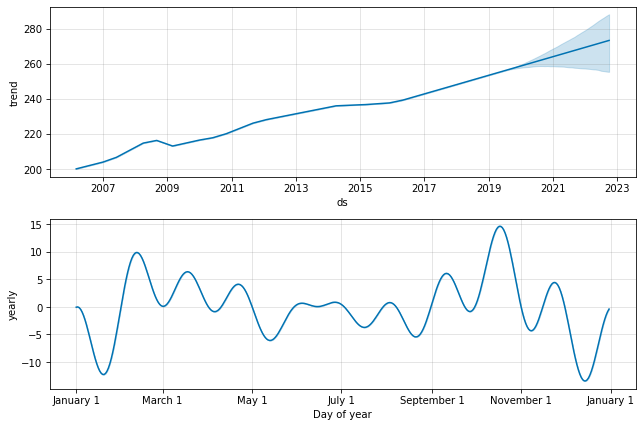

In [38]:
# Visualize the forecast components
model_baseline.plot_components(forecast_baseline);

### Comparing forecasted univariate data with test dataset

In [39]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

# Merge actual and predicted values
performance_baseline = pd.merge(test, forecast_baseline[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-40:], on='ds')

# Check MAE value
performance_baseline_MAE = mean_absolute_error(performance_baseline['y'], performance_baseline['yhat'])
print(f'The MAE for the baseline model is {performance_baseline_MAE}')

# Check MAPE value
performance_baseline_MAPE = mean_absolute_percentage_error(performance_baseline['y'], performance_baseline['yhat'])
print(f'The MAPE for the baseline model is {performance_baseline_MAPE}')

The MAE for the baseline model is 7.267090531887606
The MAPE for the baseline model is 0.025532823388008295


This means the baseline model is off about 7.27 index from the actual CPI value.

And that is about 2.55% off from the actual CPI value.

## Adding Seaonality to Baseline Model

In [40]:
# Adding yearly and monthly seasonality
model_season = Prophet(yearly_seasonality=True)
model_season.add_seasonality(period = 30.4, name='monthly', fourier_order=5)

# Fit the model on the training dataset
model_season.fit(train)

20:53:50 - cmdstanpy - INFO - Chain [1] start processing
20:53:50 - cmdstanpy - INFO - Chain [1] done processing


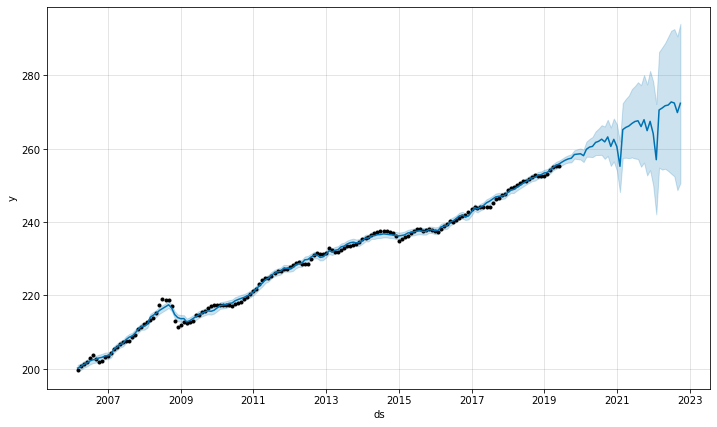

In [41]:
# Create the time range for the forecast
future_season = model_season.make_future_dataframe(periods=40, freq = 'MS')

# Make prediction
forecast_season = model_season.predict(future_season)

# Visualize the forecast
model_season.plot(forecast_season); # Add semi-colon to remove the duplicated chart

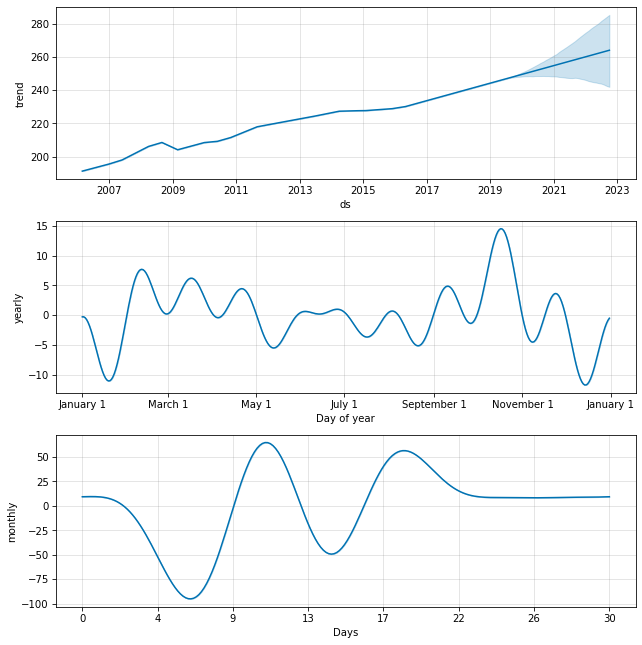

In [42]:
# Visualize the forecast components
model_season.plot_components(forecast_season);

In [43]:
# Merge actual and predicted values
performance_season = pd.merge(test, forecast_season[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-40:], on='ds')

# Check MAE value
performance_season_MAE = mean_absolute_error(performance_season['y'], performance_season['yhat'])
print(f'The MAE for the seasonality model is {performance_season_MAE}')

# Check MAPE value
performance_season_MAPE = mean_absolute_percentage_error(performance_season['y'], performance_season['yhat'])
print(f'The MAPE for the seasonality model is {performance_season_MAPE}')

The MAE for the seasonality model is 8.069041360219236
The MAPE for the seasonality model is 0.02839612715638782


Comparing the seasonal with the baseline model:

Seasonal is worse. Seasonal model is off by 8.07 index compared to the baseline model being off by 7.27 index.

And Season is off by 2.83% compared to 2.55% off from the actual CPI value.

Conclusion: Continue with baseline model

## Adding Multivariates

In [44]:
data.columns[3:]

Index(['CPI for Communication', 'CPI for Education', 'CPI for Energy',
       'CPI for Food', 'CPI for Gas', 'CPI for Medical Services',
       'CPI for Shelter', 'Employment', 'Export Price Index', 'Fed rates',
       'Import Price Index', 'Unemployment', 'Hourly Earnings',
       'Avg Bank Rates', 'Nominal GDP', 'USD Strength'],
      dtype='object')

In [45]:
# Create prophet model
model_multivariate = Prophet()

# Add regressor
for i in data.columns[3:]:
    model_multivariate.add_regressor(i, standardize=False)

# Fit the model on the training dataset
model_multivariate.fit(train)

20:53:52 - cmdstanpy - INFO - Chain [1] start processing
20:53:52 - cmdstanpy - INFO - Chain [1] done processing
20:53:52 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
20:53:52 - cmdstanpy - INFO - Chain [1] start processing
20:53:52 - cmdstanpy - INFO - Chain [1] done processing


In [46]:
# Create the time range for the forecast
future_multivariate = model_multivariate.make_future_dataframe(periods=40, freq='MS')

# Append the regressor values
future_multivariate = pd.merge(future_multivariate, data, on='ds', how='inner')

# Check the data
future_multivariate.tail(10)

,ds,y,CPI for Commodities less Food and Energy,CPI for Communication,CPI for Education,CPI for Energy,CPI for Food,CPI for Gas,CPI for Medical Services,CPI for Shelter,Employment,Export Price Index,Fed rates,Import Price Index,Unemployment,Hourly Earnings,Avg Bank Rates,Nominal GDP,USD Strength
190,2022-01-01,281.933,163.503,76.340,277.960,265.929,289.959,301.791,583.779,342.974,157174,148.2,0.08,140.1,6513,31.56,3.25,24524.988,115.0785
191,2022-02-01,284.182,164.219,76.260,278.445,275.170,292.912,321.849,584.581,344.758,157722,153.0,0.08,142.6,6270,31.60,3.25,24729.162,115.0485
192,2022-03-01,287.708,163.522,75.901,279.160,305.469,295.809,380.763,588.223,346.516,158458,159.0,0.20,146.8,5952,31.75,3.37,24967.290,116.4117
193,2022-04-01,288.663,163.819,75.560,279.772,297.233,298.379,357.377,591.331,348.290,158105,160.6,0.33,147.5,5941,31.86,3.50,24998.161,117.3118
194,2022-05-01,291.474,164.943,75.336,280.563,308.839,301.879,372.063,593.887,350.418,158426,164.9,0.77,148.2,5950,31.98,3.94,25228.382,119.8411
195,2022-06-01,295.328,166.235,75.328,281.705,332.087,304.867,413.606,598.227,352.550,158111,166.7,1.21,148.5,5912,32.11,4.38,25519.004,120.1621
196,2022-07-01,295.271,166.617,75.027,282.097,316.955,308.220,381.710,600.683,354.449,158290,160.5,1.68,146.4,5670,32.27,4.85,25476.223,122.8209
197,2022-08-01,295.620,167.381,74.895,283.499,301.045,310.664,341.383,605.320,356.894,158732,158.3,2.33,144.6,6014,32.36,5.50,25869.257,122.4264
198,2022-09-01,296.761,167.413,74.813,284.498,294.705,313.101,324.646,611.319,359.567,158936,156.0,2.56,143.0,5753,32.49,5.73,25813.680,125.7480
199,2022-10-01,298.062,166.779,74.765,284.849,300.013,314.983,337.609,607.635,362.268,158608,155.5,3.08,142.7,6059,32.64,6.25,25992.269,127.6450


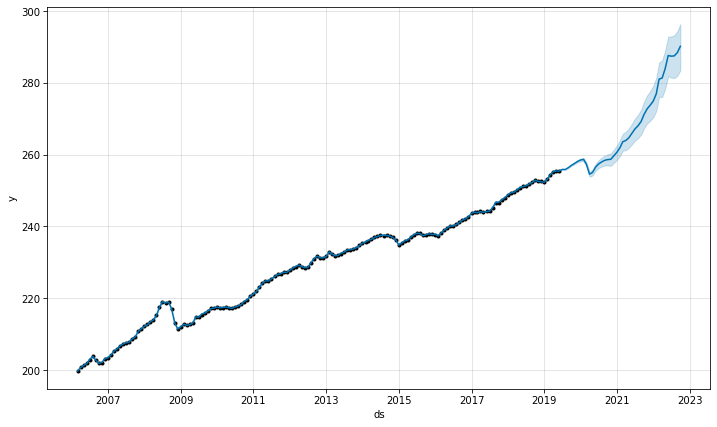

In [47]:
# Make prediction
forecast_multivariate = model_multivariate.predict(future_multivariate)

# Visualize the forecast
model_multivariate.plot(forecast_multivariate); # Add semi-colon to remove the duplicated chart

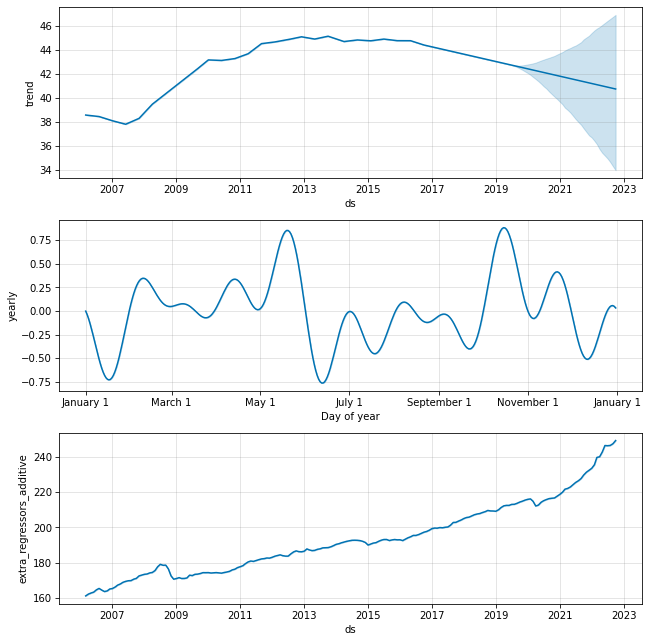

In [48]:
# Visualize the forecast components
model_multivariate.plot_components(forecast_multivariate);

In [49]:
forecast_multivariate.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Avg Bank Rates,Avg Bank Rates_lower,Avg Bank Rates_upper,CPI for Communication,...,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
195,2022-06-01,40.973725,281.829691,292.869206,35.219649,46.269565,0.400652,0.400652,0.400652,8.294780,...,246.620288,246.620288,246.620288,0.022728,0.022728,0.022728,0.0,0.0,0.0,287.616741
196,2022-07-01,40.923597,281.430815,292.912876,34.982655,46.436773,0.443645,0.443645,0.443645,8.261635,...,246.504479,246.504479,246.504479,-0.007691,-0.007691,-0.007691,0.0,0.0,0.0,287.420385
197,2022-08-01,40.871798,281.336242,293.249238,34.683575,46.605019,0.503102,0.503102,0.503102,8.247100,...,246.674802,246.674802,246.674802,-0.037530,-0.037530,-0.037530,0.0,0.0,0.0,287.509070
198,2022-09-01,40.819999,281.969519,294.392453,34.335016,46.770820,0.524141,0.524141,0.524141,8.238070,...,247.661788,247.661788,247.661788,-0.050950,-0.050950,-0.050950,0.0,0.0,0.0,288.430837
199,2022-10-01,40.769871,283.478723,296.371614,34.007139,46.940068,0.571707,0.571707,0.571707,8.232785,...,249.447620,249.447620,249.447620,-0.033304,-0.033304,-0.033304,0.0,0.0,0.0,290.184187


In [50]:
# Merge actual and predicted values
performance_multivariate = pd.merge(test, forecast_multivariate[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-40:], on='ds')

# Check MAE value
performance_multivariate_MAE = mean_absolute_error(performance_multivariate['y'], performance_multivariate['yhat'])
print(f'The MAE for the multivariate model is {performance_multivariate_MAE}')

# Check MAPE value
performance_multivariate_MAPE = mean_absolute_percentage_error(performance_multivariate['y'], performance_multivariate['yhat'])
print(f'The MAPE for the multivariate model is {performance_multivariate_MAPE}')

The MAE for the multivariate model is 3.5221557431174055
The MAPE for the multivariate model is 0.012534666451640303


Comparing the MultiVariate with the Baseline model:

Multivariate is better. Multivariate model is off by 3.52 index compared to the baseline model being off by 7.27 index.

And Multivariate is off by 1.25% compared to 2.55% off from the actual CPI value.

Conclusion: Multivariate model is better.

However, other variables for future dates would have null values, preventing the multivariate model from working.
Hence, we would need to predict each variable univariately for future dates, then feed that into out multivariate model.

This would be called FB Approach 2

# FbProphet approach 2

Sequence:
1. Train FBprophet models for each of the features with same method as univariate baseline but no train-test split
2. Train multivariate model for y (i.e. CPI for all items)
3. Project future dates and forecast for each feature using the trained models in point 1.
4. Take forecasted data from point 3 and feed into multivariate model in point 2

In [51]:
data.tail()

,ds,y,CPI for Commodities less Food and Energy,CPI for Communication,CPI for Education,CPI for Energy,CPI for Food,CPI for Gas,CPI for Medical Services,CPI for Shelter,Employment,Export Price Index,Fed rates,Import Price Index,Unemployment,Hourly Earnings,Avg Bank Rates,Nominal GDP,USD Strength
195,2022-06-01,295.328,166.235,75.328,281.705,332.087,304.867,413.606,598.227,352.550,158111,166.7,1.21,148.5,5912,32.11,4.38,25519.004,120.1621
196,2022-07-01,295.271,166.617,75.027,282.097,316.955,308.220,381.710,600.683,354.449,158290,160.5,1.68,146.4,5670,32.27,4.85,25476.223,122.8209
197,2022-08-01,295.620,167.381,74.895,283.499,301.045,310.664,341.383,605.320,356.894,158732,158.3,2.33,144.6,6014,32.36,5.50,25869.257,122.4264
198,2022-09-01,296.761,167.413,74.813,284.498,294.705,313.101,324.646,611.319,359.567,158936,156.0,2.56,143.0,5753,32.49,5.73,25813.680,125.7480
199,2022-10-01,298.062,166.779,74.765,284.849,300.013,314.983,337.609,607.635,362.268,158608,155.5,3.08,142.7,6059,32.64,6.25,25992.269,127.6450


## Training univariate models and forecast, then storing them in 2 dictionaries (model_dict & forecast_dict)

In [52]:
#Defining model and forecast dictionary

# model_list = ['Commodities', 
#             'Communication', 
#             'Education',
#             'Energy',
#             'Food',
#             'Gas',
#             'Medical',
#             'Shelter',
#             'Employ',
#             'Export',
#             'Fed_rates',
#             'Import',
#             'Unemploy',
#             'Earnings',
#             'Bank_rates',
#             'GDP',
#             'USD']

model_list = data.columns[2:]

model_dict = {}

forecast_dict = {}

for idx, key in enumerate(model_list):
    # print("Moving onto next data column.")

    data_sliced = data.iloc[:,[0, idx + 2]]
    data_sliced.rename(columns = {data_sliced.columns[1]:'y'}, inplace=True)
    # print("Data sliced and renamed.")
    
    #Training model with seasonality
    # print("Starting model training.")
    model_fb = Prophet(yearly_seasonality=True)
    model_fb.add_seasonality(period = 30.4, name='monthly', fourier_order=5)
    model_fb.fit(data_sliced)
    model_dict[key] = model_fb

    # print("Starting future forecast.")
    #Create time range for the forecast
    future = model_fb.make_future_dataframe(periods = 10, freq = 'MS')
    
    #Make forecast prediction
    forecast = model_fb.predict(future)
    forecast_dict[key] = forecast
    # print("Forecast generated and stored.")

C:\Users\dani3\AppData\Local\Temp\ipykernel_11532\960072810.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

20:53:53 - cmdstanpy - INFO - Chain [1] start processing
20:53:53 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\dani3\AppData\Local\Temp\ipykernel_11532\960072810.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

20:53:53 - cmdstanpy - INFO - Chain [1] start processing
20:53:54 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\dani3\AppData\Local\Temp\ipykernel_11532\960072810.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveat

### Loop select each model from model_dict to plot (make sure everything looks decent)

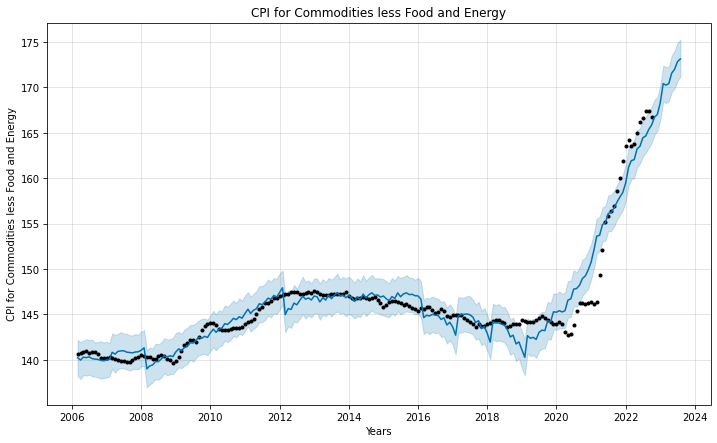

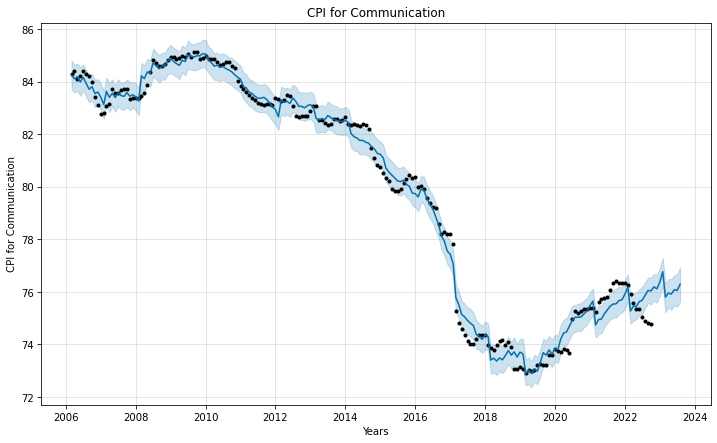

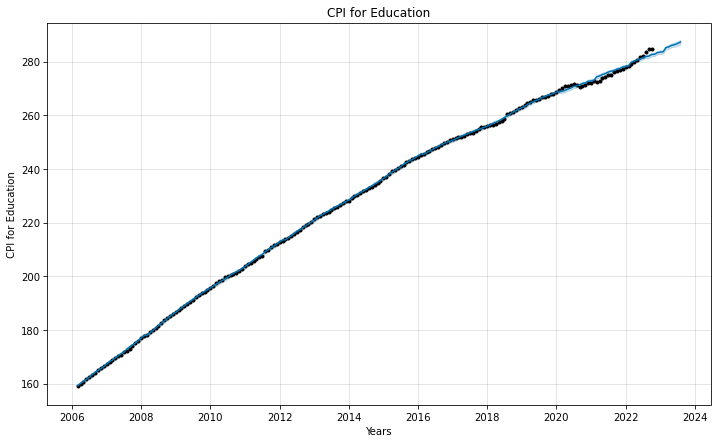

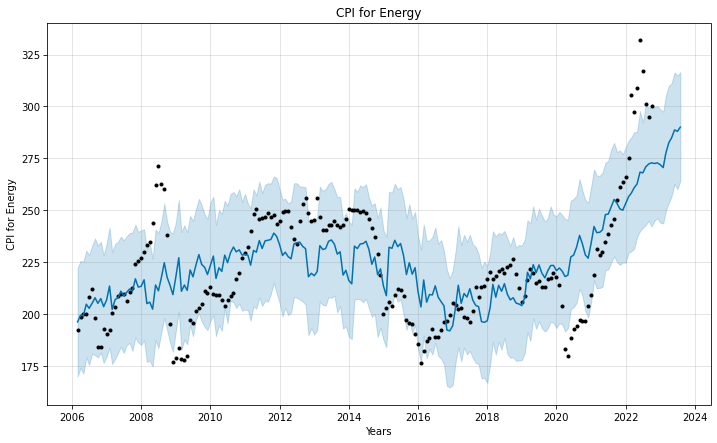

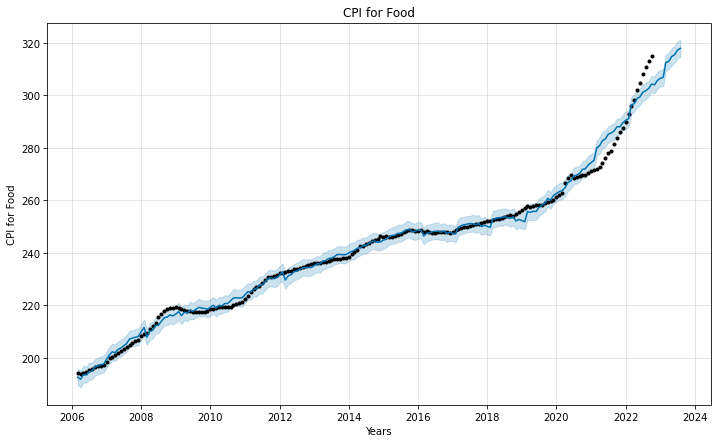

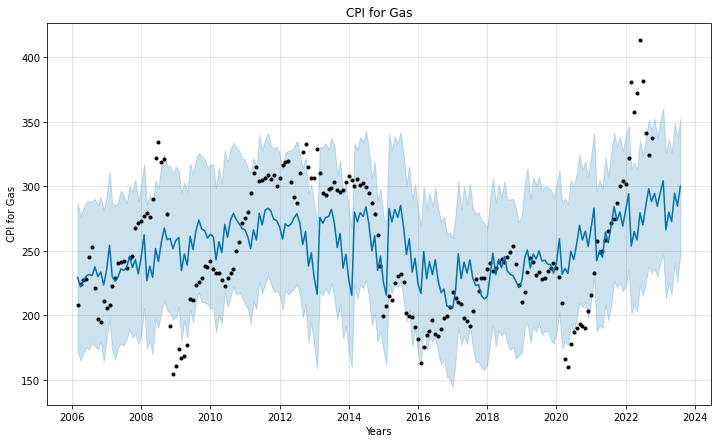

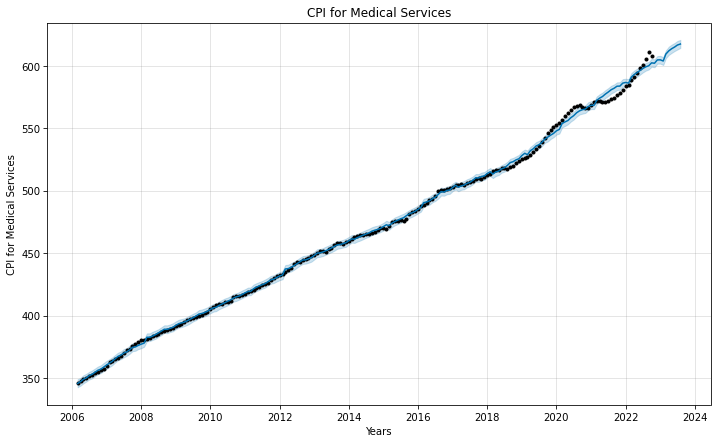

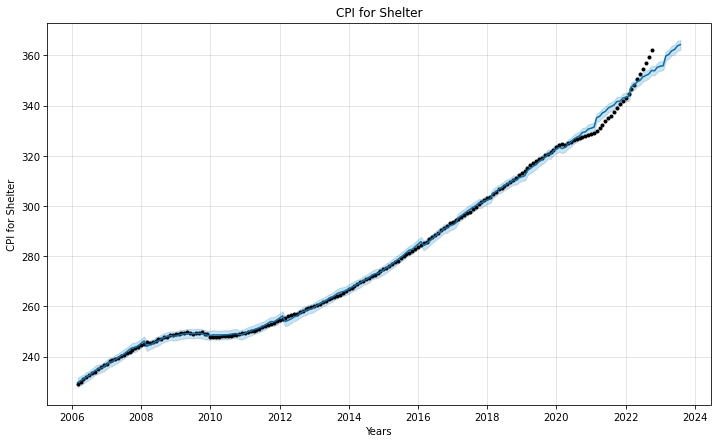

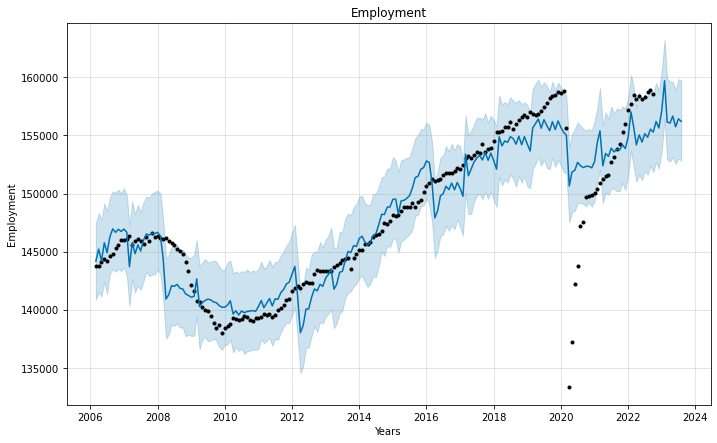

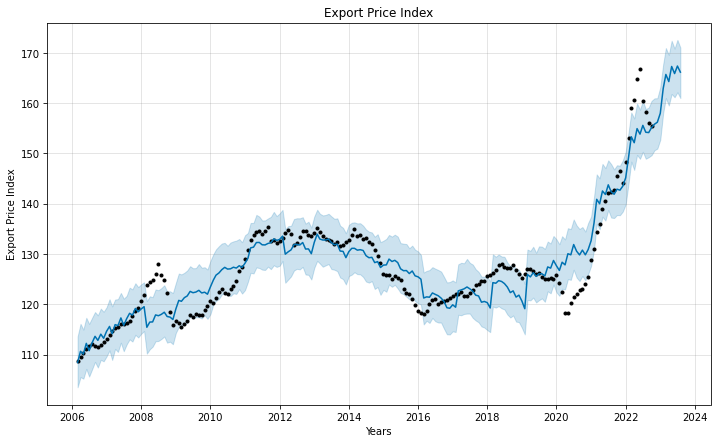

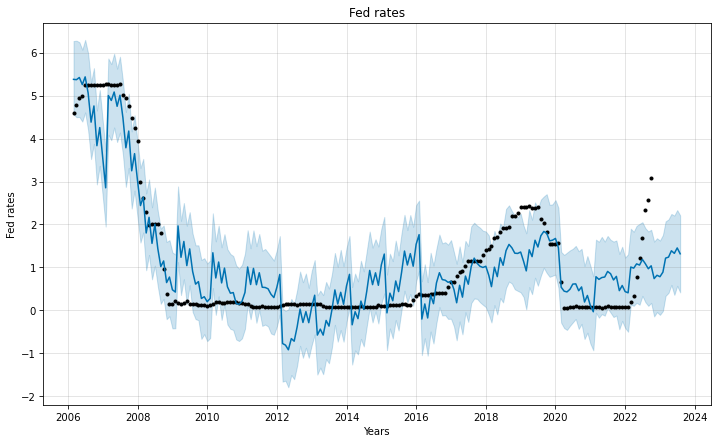

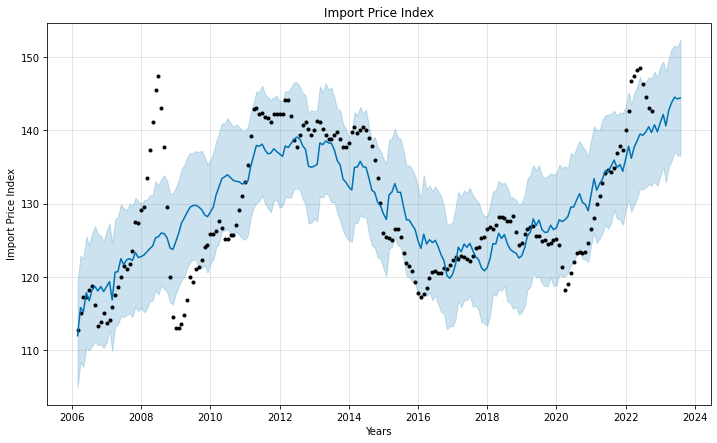

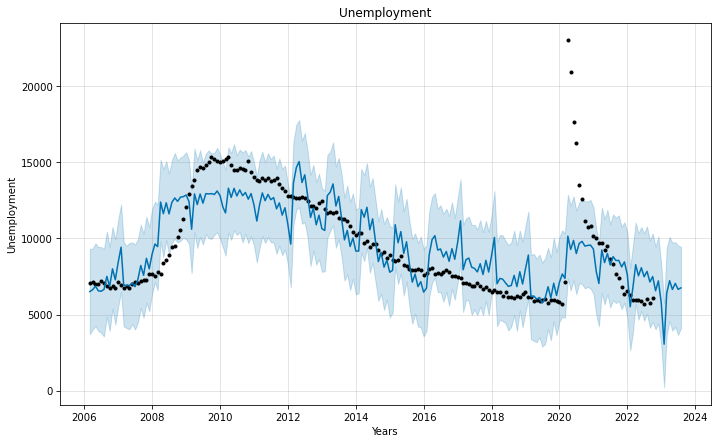

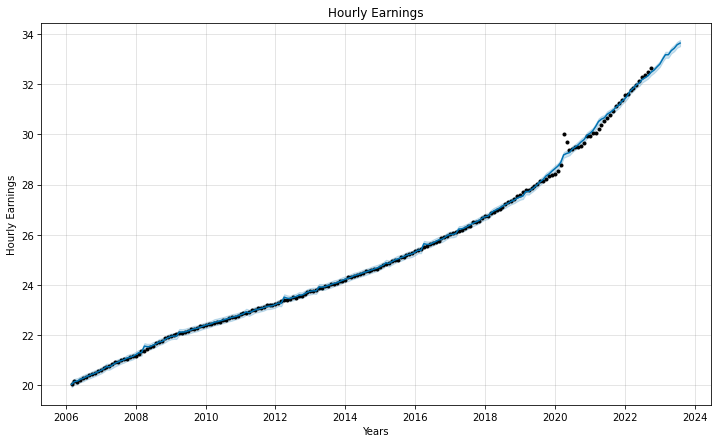

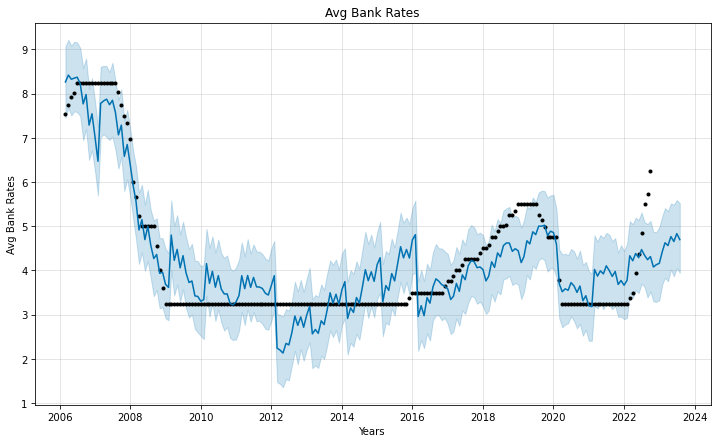

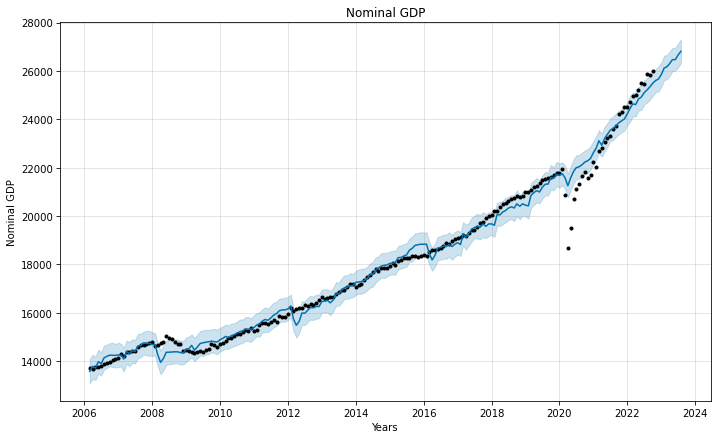

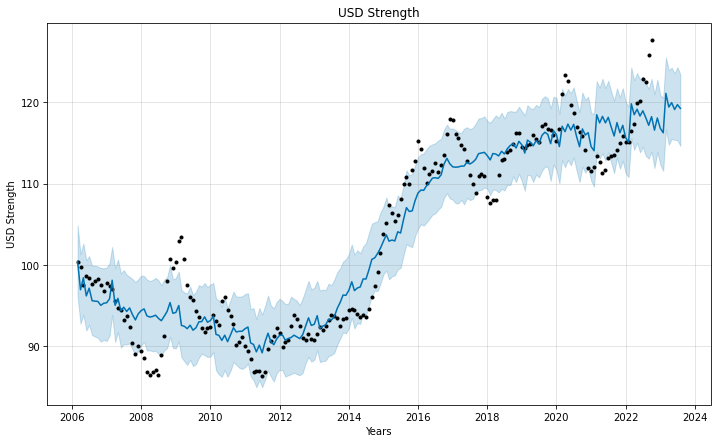

In [53]:
import matplotlib.pyplot as plt

for i in model_dict:
    # print(f'Forecast graph for {i}')
    model_dict[i].plot(forecast_dict[i]);
    plt.title(i)
    plt.xlabel("Years")
    plt.ylabel(i)
    plt.show()


In [54]:
# Visualize the forecast components
# model_dict['commodities'].plot_components(forecast_dict['commodities']);

# for i in model_dict:
#     model_dict[i].plot_components(forecast_dict[i]);
#     plt.title(i)
#     plt.show()

## Training multivariate model

In [55]:
data.columns[2:]

Index(['CPI for Commodities less Food and Energy', 'CPI for Communication',
       'CPI for Education', 'CPI for Energy', 'CPI for Food', 'CPI for Gas',
       'CPI for Medical Services', 'CPI for Shelter', 'Employment',
       'Export Price Index', 'Fed rates', 'Import Price Index', 'Unemployment',
       'Hourly Earnings', 'Avg Bank Rates', 'Nominal GDP', 'USD Strength'],
      dtype='object')

In [56]:
# Add seasonality 
model_fb_multi = Prophet(yearly_seasonality=True)
model_fb_multi.add_seasonality(period = 30.4, name='monthly', fourier_order=5)

# Add regressor
for i in data.columns[3:]:
    model_fb_multi.add_regressor(i, standardize=False)

# Fit the model on the training dataset
model_fb_multi.fit(data)

20:54:02 - cmdstanpy - INFO - Chain [1] start processing
20:54:02 - cmdstanpy - INFO - Chain [1] done processing
20:54:02 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
20:54:02 - cmdstanpy - INFO - Chain [1] start processing
20:54:03 - cmdstanpy - INFO - Chain [1] done processing


## Preparing multivariate data from forecasted values from forecast_dict

In [83]:
# Creating forecasting dates and filling it in with available real data, but leaving the forecasted dates empty for next step

future_multi = model_fb_multi.make_future_dataframe(periods=10, freq='MS')

future_multi = pd.merge(future_multi, data, on='ds', how='left')

future_multi.tail(11)

,ds,y,CPI for Commodities less Food and Energy,CPI for Communication,CPI for Education,CPI for Energy,CPI for Food,CPI for Gas,CPI for Medical Services,CPI for Shelter,Employment,Export Price Index,Fed rates,Import Price Index,Unemployment,Hourly Earnings,Avg Bank Rates,Nominal GDP,USD Strength
199,2022-10-01,298.062,166.779,74.765,284.849,300.013,314.983,337.609,607.635,362.268,158608.0,155.5,3.08,142.7,6059.0,32.64,6.25,25992.269,127.645
200,2022-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201,2022-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
202,2023-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
203,2023-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
204,2023-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
205,2023-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
206,2023-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
207,2023-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208,2023-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
# Preparing list of correct column names to replace forecast_dict's 'yhat' column names

col_names = future_multi.columns[2:]

col_names

Index(['CPI for Commodities less Food and Energy', 'CPI for Communication',
       'CPI for Education', 'CPI for Energy', 'CPI for Food', 'CPI for Gas',
       'CPI for Medical Services', 'CPI for Shelter', 'Employment',
       'Export Price Index', 'Fed rates', 'Import Price Index', 'Unemployment',
       'Hourly Earnings', 'Avg Bank Rates', 'Nominal GDP', 'USD Strength'],
      dtype='object')

In [93]:
# Filling in null values of forecasted dates for multivariates based on forecast_dict witha loop function

num = 0

for h in forecast_dict:
    # Saving the first forecasted values into a temporary dataframe
    test_1 = pd.DataFrame.from_dict(forecast_dict[h]).copy()
    # Renaming the 'yhat' to the correct column header name
    test_1.rename({'yhat': col_names[num]}, axis=1, inplace=True)
    # Slicing the dataset for easier replacement
    test_1 = test_1.iloc[:, [0, -1]]
    num += 1
    # print('Ported out forecasted dataset and renamed header to be same as future_multi')
    
    # Filling null values for column +=1 with the corrected named temporary dataframe
    future_multi.iloc[:, num+1].fillna(test_1.iloc[:, 1].tail(10), inplace=True)
    
    # print('Successfully added in the null values with ported out dataset')

In [94]:
# Double checking that everything is correct besides 'y' which is the CPI for all items

future_multi.tail(11)

,ds,y,CPI for Commodities less Food and Energy,CPI for Communication,CPI for Education,CPI for Energy,CPI for Food,CPI for Gas,CPI for Medical Services,CPI for Shelter,Employment,Export Price Index,Fed rates,Import Price Index,Unemployment,Hourly Earnings,Avg Bank Rates,Nominal GDP,USD Strength
199,2022-10-01,298.062,166.779000,74.765000,284.849000,300.013000,314.983000,337.609000,607.635000,362.268000,158608.000000,155.500000,3.080000,142.700000,6059.000000,32.640000,6.250000,25992.269000,127.645000
200,2022-11-01,NaN,166.712620,76.186201,282.688200,272.489903,304.041560,294.543116,602.006509,353.865456,156199.404595,155.812877,0.741365,140.781513,6558.613645,32.556572,4.076583,25601.486208,116.562066
201,2022-12-01,NaN,167.017167,76.109750,283.300036,272.795570,305.648317,284.622487,604.679169,355.301560,155642.102157,156.202121,0.818244,139.808545,7210.380878,32.679441,4.129412,25658.943738,118.054350
202,2023-01-01,NaN,168.317911,76.363847,283.494500,271.895237,306.536809,295.298010,604.737578,355.690863,157105.193826,157.976860,0.784641,141.061527,5772.595608,32.796704,4.159793,25844.117581,116.790710
203,2023-02-01,NaN,170.418775,76.763049,283.627566,270.524555,306.867710,304.433384,603.800149,355.910404,159713.638771,162.932848,0.890802,142.191599,3051.198705,33.003138,4.425219,26118.182475,116.234701
204,2023-03-01,NaN,170.247859,75.795905,285.170610,277.525291,312.553995,266.351759,609.365179,359.765610,156156.505131,165.706759,1.217709,140.637032,6398.475582,33.171418,4.625366,26166.774595,121.075723
205,2023-04-01,NaN,170.407808,75.948247,285.475316,282.477740,312.953340,280.032328,611.921300,360.427032,156062.032616,164.288044,1.240843,142.777827,7219.790855,33.172120,4.561444,26299.284600,119.398589
206,2023-05-01,NaN,171.553560,75.911512,286.038860,284.929230,314.803872,272.803643,613.628007,361.827504,156668.676877,167.290294,1.388209,143.806254,6644.747280,33.335928,4.764730,26465.946410,119.939802
207,2023-06-01,NaN,171.993496,76.075676,286.279858,288.682683,315.500006,294.861255,614.977222,362.366508,155743.811384,165.881527,1.328627,144.549980,7044.763089,33.428273,4.653645,26465.483412,119.091506
208,2023-07-01,NaN,172.819296,76.047565,286.731760,287.971596,317.209452,284.707701,616.586915,363.814510,156432.491492,167.379978,1.453725,144.302180,6654.533809,33.568598,4.831609,26654.271327,119.690084


## Making multvariate prediction

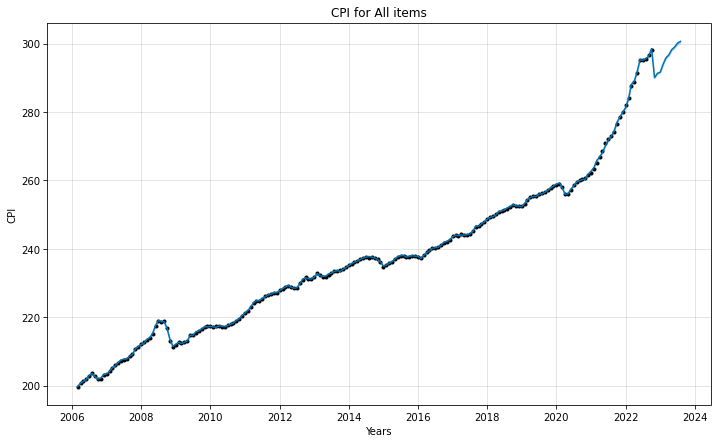

In [61]:
# Make prediction
forecast_multi = model_fb_multi.predict(future_multi)

# Visualize the forecast
model_fb_multi.plot(forecast_multi); # Add semi-colon to remove the duplicated chart
plt.title('CPI for All items')
plt.xlabel("Years")
plt.ylabel('CPI')
plt.show()

## Tidying up forecasted dataset and exporting to csv

In [84]:
forecast_multi.tail(10)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Avg Bank Rates,Avg Bank Rates_lower,Avg Bank Rates_upper,CPI for Communication,...,monthly,monthly_lower,monthly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
200,2022-11-01,2139.777587,289.853905,290.292754,2139.777587,2139.777587,-0.427028,-0.427028,-0.427028,8.827795,...,-2230.553675,-2230.553675,-2230.553675,0.081897,0.081897,0.081897,0.0,0.0,0.0,290.066151
201,2022-12-01,2139.572800,291.030492,291.503237,2139.566323,2139.577982,-0.432562,-0.432562,-0.432562,8.818936,...,-2230.264733,-2230.264733,-2230.264733,0.051293,0.051293,0.051293,0.0,0.0,0.0,291.260595
202,2023-01-01,2139.361186,291.421216,291.924839,2139.335294,2139.389653,-0.435745,-0.435745,-0.435745,8.848379,...,-2230.652566,-2230.652566,-2230.652566,0.073146,0.073146,0.073146,0.0,0.0,0.0,291.671578
203,2023-02-01,2139.149572,293.791731,294.283691,2139.095831,2139.216035,-0.463548,-0.463548,-0.463548,8.894635,...,-2229.388333,-2229.388333,-2229.388333,0.033676,0.033676,0.033676,0.0,0.0,0.0,294.051922
204,2023-03-01,2138.958437,295.527494,296.058682,2138.867002,2139.068461,-0.484514,-0.484514,-0.484514,8.782570,...,-2230.186679,-2230.186679,-2230.186679,-0.235956,-0.235956,-0.235956,0.0,0.0,0.0,295.789454
205,2023-04-01,2138.746823,296.408578,296.976260,2138.614156,2138.901581,-0.477818,-0.477818,-0.477818,8.800222,...,-2230.095941,-2230.095941,-2230.095941,-0.073077,-0.073077,-0.073077,0.0,0.0,0.0,296.682752
206,2023-05-01,2138.542035,297.886781,298.533549,2138.366198,2138.753045,-0.499113,-0.499113,-0.499113,8.795966,...,-2230.149086,-2230.149086,-2230.149086,-0.103532,-0.103532,-0.103532,0.0,0.0,0.0,298.205831
207,2023-06-01,2138.330422,298.628044,299.327368,2138.101017,2138.611005,-0.487476,-0.487476,-0.487476,8.814988,...,-2230.108292,-2230.108292,-2230.108292,0.062451,0.062451,0.062451,0.0,0.0,0.0,298.975861
208,2023-07-01,2138.125634,299.764181,300.471397,2137.858722,2138.472549,-0.506118,-0.506118,-0.506118,8.811731,...,-2230.114297,-2230.114297,-2230.114297,0.005929,0.005929,0.005929,0.0,0.0,0.0,300.107659
209,2023-08-01,2137.914020,300.211376,301.094138,2137.581802,2138.317703,-0.491906,-0.491906,-0.491906,8.839000,...,-2230.163043,-2230.163043,-2230.163043,0.044356,0.044356,0.044356,0.0,0.0,0.0,300.602008


In [85]:
forecast_multi.iloc[:, -1].tail(10)

200    290.066151
201    291.260595
202    291.671578
203    294.051922
204    295.789454
205    296.682752
206    298.205831
207    298.975861
208    300.107659
209    300.602008
Name: yhat, dtype: float64

In [97]:
tableau_dataset = future_multi.copy()

tableau_dataset.iloc[:, 1].fillna(forecast_multi.iloc[:, -1].tail(10), inplace = True)

In [98]:
tableau_dataset

,ds,y,CPI for Commodities less Food and Energy,CPI for Communication,CPI for Education,CPI for Energy,CPI for Food,CPI for Gas,CPI for Medical Services,CPI for Shelter,Employment,Export Price Index,Fed rates,Import Price Index,Unemployment,Hourly Earnings,Avg Bank Rates,Nominal GDP,USD Strength
0,2006-03-01,199.700000,140.600000,84.300000,159.100000,192.000000,194.000000,208.300000,346.300000,229.300000,143741.000000,108.800000,4.590000,112.700000,7072.000000,20.040000,7.530000,13711.223000,100.428100
1,2006-04-01,200.700000,140.800000,84.400000,159.900000,198.500000,193.800000,224.000000,347.600000,230.100000,143761.000000,109.600000,4.790000,115.100000,7120.000000,20.160000,7.750000,13695.003000,99.743500
2,2006-05-01,201.300000,140.900000,84.100000,160.700000,199.800000,194.100000,227.500000,348.900000,231.000000,144089.000000,110.400000,4.940000,117.200000,6980.000000,20.130000,7.930000,13782.849000,97.511800
3,2006-06-01,201.800000,141.000000,84.200000,161.600000,199.800000,194.700000,228.100000,350.200000,231.900000,144353.000000,111.200000,4.990000,117.300000,7001.000000,20.220000,8.020000,13782.420000,98.692700
4,2006-07-01,202.900000,140.800000,84.400000,162.400000,207.900000,195.200000,245.300000,351.200000,232.700000,144202.000000,111.600000,5.240000,118.200000,7175.000000,20.300000,8.250000,13791.729000,98.438700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,2023-04-01,296.682752,170.407808,75.948247,285.475316,282.477740,312.953340,280.032328,611.921300,360.427032,156062.032616,164.288044,1.240843,142.777827,7219.790855,33.172120,4.561444,26299.284600,119.398589
206,2023-05-01,298.205831,171.553560,75.911512,286.038860,284.929230,314.803872,272.803643,613.628007,361.827504,156668.676877,167.290294,1.388209,143.806254,6644.747280,33.335928,4.764730,26465.946410,119.939802
207,2023-06-01,298.975861,171.993496,76.075676,286.279858,288.682683,315.500006,294.861255,614.977222,362.366508,155743.811384,165.881527,1.328627,144.549980,7044.763089,33.428273,4.653645,26465.483412,119.091506
208,2023-07-01,300.107659,172.819296,76.047565,286.731760,287.971596,317.209452,284.707701,616.586915,363.814510,156432.491492,167.379978,1.453725,144.302180,6654.533809,33.568598,4.831609,26654.271327,119.690084


In [99]:
tableau_dataset.to_csv('tableau_dataset.csv', index=False)

# LSTM
TBC

Multivariate time series forecasting using LSTM: https://analyticsindiamag.com/how-to-do-multivariate-time-series-forecasting-using-lstm/